### 목표 : 생선 품종 분류 모델
- 데이터 : 2가지 품종의 생선 데이터 fish.csv
- 피 쳐 : Weight, Length
- 타 겟 : Species
- 유 형 : 지도학습 + 분류
- 최적의 K 즉, 이웃의 수 찾기 

(1) 모듈 로딩 & 데이터 준비

In [10]:
import pandas as pd                                    # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier     # 기계 학습 관련 모듈
import matplotlib.pyplot as plt

In [11]:
data_file = '../data/fish.csv'

In [12]:
# 5개 피쳐/특성 중 2개의 피쳐/특성 선택
fishDF = pd.read_csv(data_file, usecols=[0,1,2])

fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [13]:
# Bream, Smelt 품종 행만 추출
twofishDF = fishDF[fishDF['Species'].isin(['Bream','Smelt'])]  # Boolean Indexing

# 해당 행만 도출
twofishDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [14]:
twofishDF.reset_index(drop = True, inplace=True)
twofishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


(2) 데이터 전처리 <hr>
- 정제 : 결측치, 중복 데이터, 이상치 처리
- 정규화 : 피쳐 스케일링


In [15]:
# 표준 정규 분포 => 평균 0, 표준편차 1 => Z-score = (피쳐 - 평균) / 표준편차

# Weight 컬럼
twofishDF.Weight.mean(), twofishDF.Weight.std()
retW = (twofishDF.Weight - twofishDF.Weight.mean()) /twofishDF.Weight.std()
# twofishDF.loc[:,'Weight'] = retW

# Length 컬럼
twofishDF.Length.mean(), twofishDF.Length.std()
retL = (twofishDF.Length - twofishDF.Length.mean()) /twofishDF.Length.std()
# twofishDF.loc[:,'Length'] = retL

In [16]:
twofishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


(3) 기계학습 데이터셋 준비
- 피쳐와 타겟 분리
- 피쳐/특성 + 타겟/라벨/클래스
- 학습용 데이터셋     : 80%
- 테스트용 데이터셋   : 20%

In [17]:
# 피쳐/특성/속성 데이터 추출
featureDF = twofishDF[twofishDF.columns[1:]]
featureDF

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0
5,450.0,29.7
6,500.0,29.7
7,390.0,30.0
8,450.0,30.0
9,500.0,30.7


In [18]:
# 클래스/타겟/라벨 데이터 추출 ==> 수치화 즉 정수 인코딩
targetSR = twofishDF['Species']
targetSR = targetSR.replace({'Bream':0,'Smelt':1})
targetSR

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
Name: Species, dtype: int64

(3-1) 학습/테스트 데이터셋 분리<hr>
- 지도학습 중 분류 => [고려] 타겟의 비율
- 학습 : 테스트 = 80 : 20

In [19]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(featureDF,targetSR, test_size = 0.2, stratify=targetSR)

In [21]:
# 학습 및 테스트 데이터셋 확인
print(f'학습용 데이터셋 ---> \n{x_train.shape},{y_train.shape}')
print(f'\n{y_train.value_counts()/y_train.shape[0]}')
print(f'테스트용 데이터셋 ---> \n{x_test.shape},{y_test.shape}')
print(f'\n{y_test.value_counts()/y_test.shape[0]}')

학습용 데이터셋 ---> 
(39, 2),(39,)

Species
0    0.717949
1    0.282051
Name: count, dtype: float64
테스트용 데이터셋 ---> 
(10, 2),(10,)

Species
0    0.7
1    0.3
Name: count, dtype: float64


(3-2) 피쳐 데이터의 스케일링 <hr>
- 피쳐들의 값의 범위가 다른 것을 통일 시켜줌
- scikit-learn의 preprocessing 모듈 활용
1. 스케일러 인스턴스 생성
2. 데이터에 대한 평균, 표준편차 계산 진행 :fit() 메서드
3. 데이터에 대한 스케일링 진행 : transform() 메서드

In [22]:
# 모듈 로딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(x_train)

StandardScaler()

In [25]:
# test용에도 적용하기 위해 따로 저장해야함
scaler.mean_

array([466.41282051,  27.36153846])

In [26]:
# 학습용 데이터 피쳐 스케일링
scaled_x_train = scaler.transform(x_train)
scaled_x_train.shape

(39, 2)

In [27]:
# 테스트용 데이터 피쳐 스케일링
scaled_x_test = scaler.transform(x_test)
scaled_x_test.shape

(10, 2)

(3-3) 시각화<hr>

In [28]:
# 모듈 로딩
import matplotlib.pyplot as plt

In [29]:
x_train

,Weight,Length
29,1000.0,37.0
39,9.8,11.2
43,9.8,12.0
11,500.0,31.0
17,700.0,33.0
30,920.0,38.5
48,19.9,15.0
10,475.0,31.0
31,955.0,38.5
28,850.0,36.0


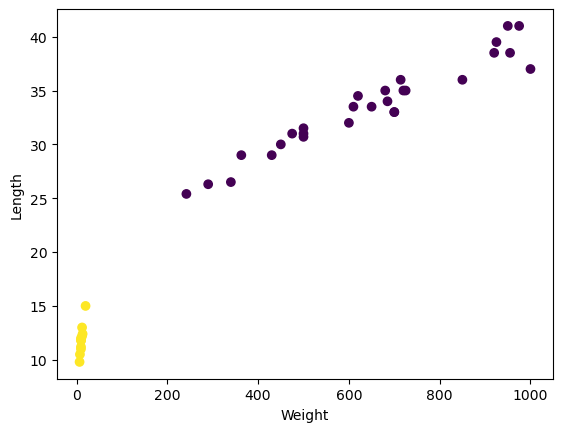

In [30]:
## 원본 데이터 시각화 ==> x_train
plt.scatter(x_train.Weight,x_train.Length, c = y_train)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

In [31]:
scaled_x_train

array([[ 1.57706374,  0.93238286],
       [-1.34955927, -1.56339696],
       [-1.34955927, -1.48600844],
       [ 0.09926986,  0.35196895],
       [ 0.69038741,  0.54544025],
       [ 1.34061672,  1.07748634],
       [-1.31970783, -1.19580148],
       [ 0.02538016,  0.35196895],
       [ 1.44406229,  1.07748634],
       [ 1.13372558,  0.83564721],
       [ 0.42438451,  0.59380808],
       [-1.34246586, -1.46666131],
       [-0.04850953,  0.2552333 ],
       [-1.34896815, -1.50535557],
       [-1.34985483, -1.58274409],
       [ 0.73176564,  0.83564721],
       [ 1.50317405,  1.31932547],
       [-0.52140357, -0.10268862],
       [ 1.42928435,  1.31932547],
       [ 0.64605359,  0.64217591],
       [ 0.63127566,  0.73891156],
       [ 0.74949917,  0.73891156],
       [ 1.35539466,  1.17422199],
       [-1.35872159, -1.69882687],
       [ 0.54260802,  0.59380808],
       [-1.35635712, -1.63111192],
       [-1.34246586, -1.38927279],
       [ 0.69038741,  0.54544025],
       [-0.30564567,

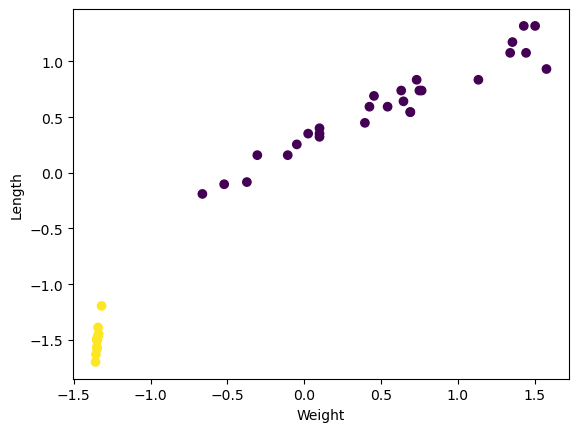

In [32]:
## 스케일된 데이터 시각화 => scaled_x_train
plt.scatter(scaled_x_train[:,0],scaled_x_train[:,1], c = y_train)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

(4) 학습 진행

In [37]:
# 방법 1 : KNN 알고리즘
# 모델 성능을 좌우하는 매개변수 => 하이퍼파라미터 : n_neighbors
# n_neighbors 즉 k 갯수 : 1 ~ 전체 데이터 수
max_k = scaled_x_train.shape[0]

test_scoreList = []
train_scoreList = []

for k in range(1, max_k+1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_x_train, y_train)
    
    train_scoreList.append(model.score(scaled_x_train, y_train))
    test_scoreList.append(model.score(scaled_x_test, y_test))

In [38]:
# 학습 및 테스트 데이터에 대한 점수 확인
train_scoreList, test_scoreList

([1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.717948717948718,
  0.717948717948718,
  0.717948717948718,
  0.717948717948718,
  0.717948717948718,
  0.717948717948718,
  0.717948717948718,
  0.717948717948718,
  0.717948717948718,
  0.717948717948718,
  0.717948717948718,
  0.717948717948718,
  0.717948717948718,
  0.717948717948718,
  0.717948717948718,
  0.717948717948718,
  0.717948717948718,
  0.717948717948718],
 [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.7,
  0.7,
  0.7,
  0.7,
  0.7,
  0.7,
  0.7,
  0.7,
  0.7,
  0.7,
  0.7,
  0.7,
  0.7,
  0.7,
  0.7,
  0.7,
  0.7,
  0.7])

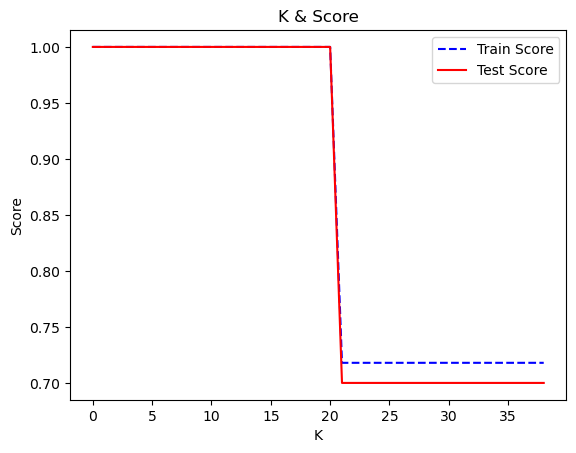

In [39]:
# K 갯수에  따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, "b--", label = "Train Score")
plt.plot(test_scoreList, "r-", label = "Test Score")
plt.title("K & Score")
plt.xlabel("K")
plt.ylabel("Score")
plt.legend()
plt.show()